<a href="https://colab.research.google.com/github/Mildredkulei7/descision_trees_W8/blob/main/Moringa_DSC_IP_W8_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

## 1. Defining The Question

### A). Specifying the question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### B). Defining metric for success

Creating a model with high accuracy using decision trees and support vector machine.

### C). Understanding the context

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

### D). Recording the experimental Design

* 1.Defining the question
* 2.Importing the libraries
* 3.Reading the data
* 4.External Data source validation
* 5.Data cleaning
* 6.Exploratory data analysis(Univeriate and Bivariate summaries)
* 7.Regressionanalysis
* 8.Implementing the solution
* 9.Challenge the solution
* 10.Follow up question

## 2. Importing the libraries

In [120]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC,LinearSVC

# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

## 3. Reading the data

In [121]:
#loading the dataset

hypothyroid=pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [122]:
#Checking the size of the dataset
hypothyroid.shape

(3163, 26)

In [123]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [124]:
# Previewing the top of our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [125]:
#previewing the bottom of the dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [126]:
# Checking whether each column has an appropriate datatype

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [127]:
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 5. Data Cleaning

In [128]:
#checking for duplicates
hypothyroid.duplicated().sum()

77

In [129]:
duplicateRowsDF = hypothyroid[hypothyroid.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
           status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
53    hypothyroid  69   F            f  ...            y   61            n   ?
66    hypothyroid  62   M            f  ...            y   10            n   ?
124   hypothyroid  77   F            f  ...            y   49            n   ?
128   hypothyroid  79   F            f  ...            y   48            n   ?
131   hypothyroid  50   F            t  ...            y   60            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3048     negative  28   M            f  ...            y  103            n   ?
3055     negative  33   F            f  ...            y   86            n   ?
3066     negative  74   F            t  ...            y  107            n   ?
3111     negative  89   M            f  ...            y  103            n   ?
3151     negative  58   F            f  ...            y  108    

I will choose to retain the duplicates as we see not all column values are same.

In [130]:
#checking for nulls
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

Converting the data types.

In [131]:
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?


**Anomalies**

In [132]:
#checking for anomalies
hypothyroid['TBG'].value_counts()

?       2903
28        14
21        13
25        13
23        13
31        12
30        12
20        12
19        10
29        10
33        10
27        10
36         9
32         9
26         9
17         8
16         8
38         7
18         7
34         6
110        5
35         5
39         5
40         4
108        4
37         4
22         4
43         3
14         3
24         3
13         2
53         2
41         2
65         2
15         2
9.30       1
7.30       1
11         1
80         1
47         1
63         1
50         1
3.10       1
69         1
12         1
0          1
122        1
8.40       1
45         1
48         1
86         1
52         1
8.50       1
Name: TBG, dtype: int64

we will have to delete the TBG column as 91% of its rows does not have values instead it has "?". We will not compute values for them as they are many and it will not be a true repressentative of the real data.

In [133]:
#dropping the yr_renovate column
hypothyroid.drop(['TBG'], axis=1, inplace=True)
hypothyroid.shape

(3163, 25)

In [134]:
#checking for unique values in the dataset.
for i in hypothyroid.columns:
 print(hypothyroid[i].unique())
 print ("\n")

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

We have noticed that there are many "?" in the columns instead of numbers, so we will have to act on them.

In [135]:
#changing the rows where it has "?" instead of an actual number, we are converting it to "nan" values then we will later act on them.
hypothyroid = hypothyroid.replace('?', np.nan)
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n


In [136]:
hypothyroid.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

In [137]:
hypothyroid[["age", "TSH", "TT4", "T4U", "T3", "FTI"]] = hypothyroid[["age", "TSH", "T3", "T4U", "TT4", "FTI"]].astype(float)

In [138]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

We will compute the null values with mean.

In [139]:
hypothyroid.fillna(hypothyroid.mean(), inplace=True)

In [140]:
hypothyroid.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

The remaining null values wiil have to be deleted.

In [141]:
hypothyroid = hypothyroid.dropna()
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [142]:
hypothyroid['age']=hypothyroid['age'].astype(int)

## 6. EDA

### 1.Univariate Analysis

A) NUMERICALS

In [76]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3090 non-null   object 
 1   age                        3090 non-null   int64  
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3090 non-null   object 
 4   query_on_thyroxine         3090 non-null   object 
 5   on_antithyroid_medication  3090 non-null   object 
 6   thyroid_surgery            3090 non-null   object 
 7   query_hypothyroid          3090 non-null   object 
 8   query_hyperthyroid         3090 non-null   object 
 9   pregnant                   3090 non-null   object 
 10  sick                       3090 non-null   object 
 11  tumor                      3090 non-null   object 
 12  lithium                    3090 non-null   object 
 13  goitre                     3090 non-null   objec

In [77]:
#creating frequency table for bedrooms
hypothyroid['age'].value_counts()

51    423
59     64
60     64
62     63
28     60
     ... 
90      1
93      1
5       1
7       1
4       1
Name: age, Length: 92, dtype: int64

In [78]:
#creating frequency table for t3
hypothyroid['T3'].value_counts()

108.85    244
98.00      50
106.00     46
87.00      42
90.00      42
         ... 
450.00      1
287.00      1
2.30        1
267.00      1
359.00      1
Name: T3, Length: 263, dtype: int64

In [79]:
#creating frequency table for T4U
hypothyroid['T4U'].value_counts()

0.978199    243
0.980000     86
0.990000     81
1.010000     80
0.960000     79
           ... 
1.930000      1
1.800000      1
1.940000      1
1.540000      1
1.640000      1
Name: T4U, Length: 150, dtype: int64

In [80]:
#creating frequency table for TSH
hypothyroid['TSH'].value_counts()

0.00000      879
5.92318      456
0.90000       74
0.70000       74
0.80000       69
            ... 
140.00000      1
55.00000       1
43.00000       1
13.20000       1
0.08000        1
Name: TSH, Length: 235, dtype: int64

In [81]:
#creating frequency table for TT4
hypothyroid['TT4'].value_counts()

1.939749     683
1.800000     140
1.600000     138
2.100000     136
1.700000     136
            ... 
8.900000       1
0.000000       1
5.600000       1
9.800000       1
10.200000      1
Name: TT4, Length: 69, dtype: int64

In [82]:
#creating frequency table for FTI
hypothyroid['FTI'].value_counts()

115.397771    242
98.000000      55
96.000000      54
107.000000     54
105.000000     48
             ... 
42.000000       1
305.000000      1
345.000000      1
355.000000      1
7.200000        1
Name: FTI, Length: 255, dtype: int64

B) SUMMARRY STATISTICS

In [83]:
# Ploting the summaries and recording our observations
#
#sumarry statistics
hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,51.192233,5.936136,108.459968,1.933220,0.984648,112.009437
std,18.042824,22.296031,43.323004,0.868751,0.210214,41.373266
min,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,37.250000,0.000000,85.000000,1.500000,0.870000,92.000000
50%,51.000000,1.000000,106.000000,1.939749,0.978199,109.000000
75%,65.000000,5.923180,124.000000,2.200000,1.050000,125.000000
max,98.000000,530.000000,450.000000,10.200000,2.210000,485.000000


In [84]:
#mode
hypothyroid.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,negative,51,F,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,108.85,y,1.939749,y,0.978199,y,115.397771,n


In [85]:
#variance
hypothyroid.var()

age     325.543481
TSH     497.112977
T3     1876.882638
TT4       0.754728
T4U       0.044190
FTI    1711.747150
dtype: float64

low variance show how mass of the points are centered around and greater the variance the greater the spread.

In [86]:
#skewness of housing variables
hypothyroid.skew()

age    -0.173210
TSH    10.977944
T3      1.597642
TT4     2.357561
T4U     1.268086
FTI     1.584457
dtype: float64

negative-skewd means that the distribution is left-skewed, has a long left tail, while positively-skewed means that the distribution is right-skewed, has a long right tail.

In [87]:
#kurtosis of housing variables
hypothyroid.kurt()

age     -0.667647
TSH    176.594575
T3       8.225074
TT4     13.896978
T4U      4.127086
FTI      9.470219
dtype: float64

A positive value shows that a tail is heavy, meaning there is alot of data on the tail, while negative tail shows that the tail is light meaning that there are few data on the tail.

### 2. Bivariate Analysis

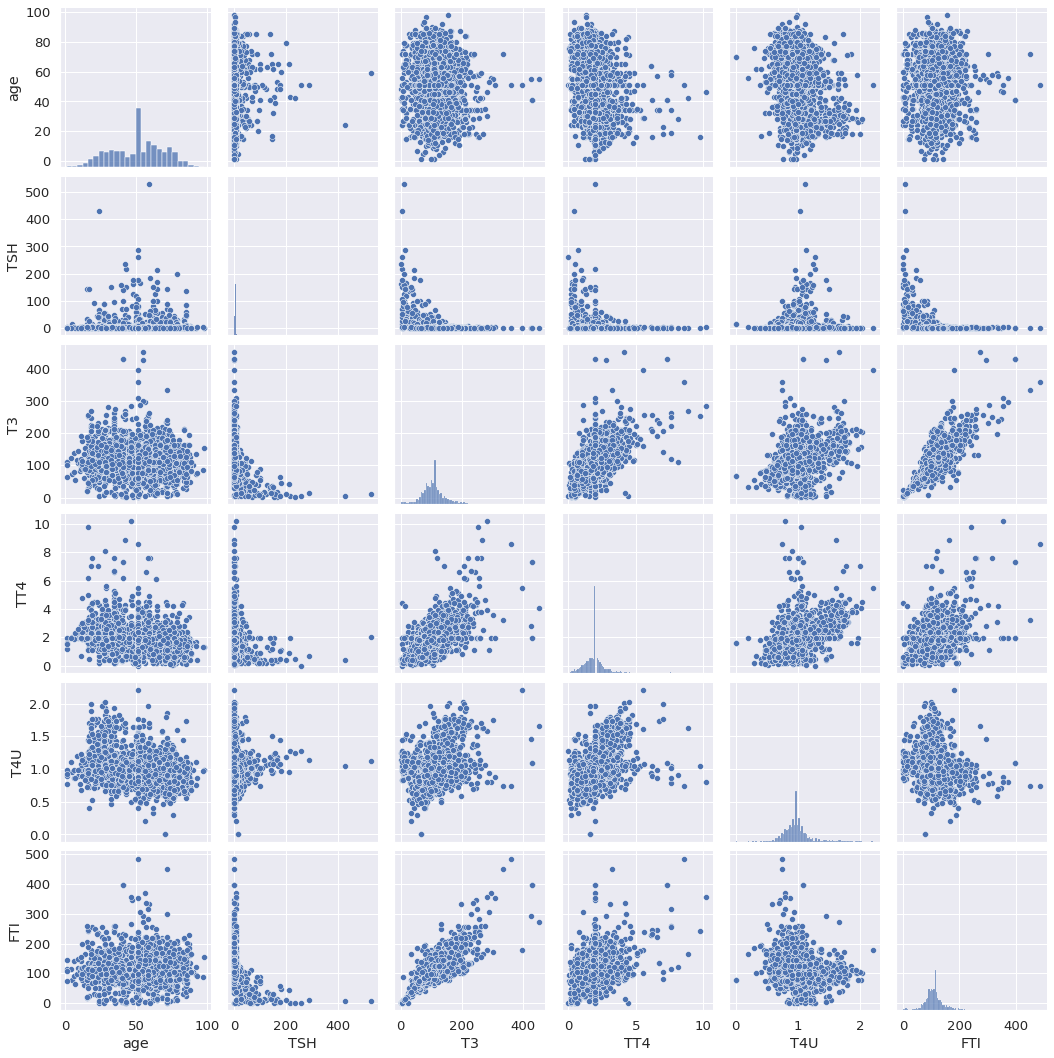

In [88]:
sns.pairplot(hypothyroid)
plt.show()
#this shows that there is relationship between some numericals.

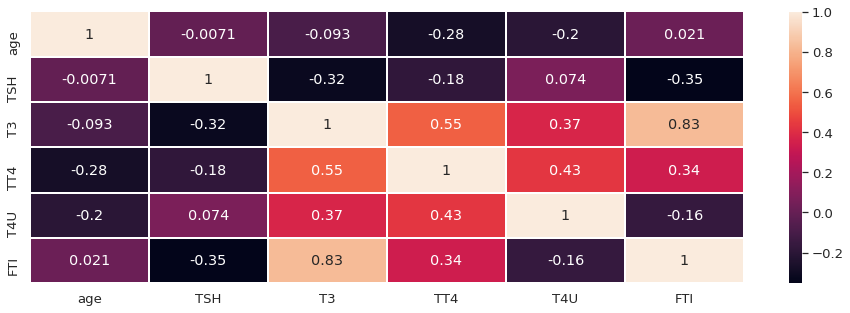

In [89]:
plt.figure(figsize = (16,5))
sns.heatmap(hypothyroid.corr(), annot=True, linewidths=1)
plt.show()
#it clearly show how some numericals have week relationship and others dont have.

B) Categorical

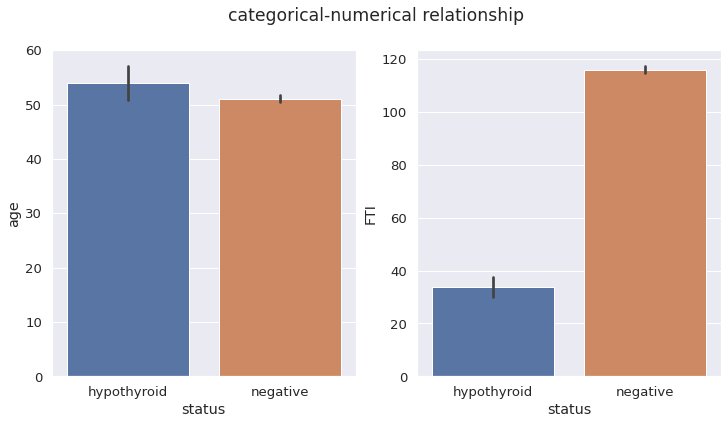

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(hypothyroid['status'], y= hypothyroid['age'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['FTI'], ax=ax2)
plt.show()
#Those with low FTI have hypothyroid but those with high FTI do not have hypothyroid.

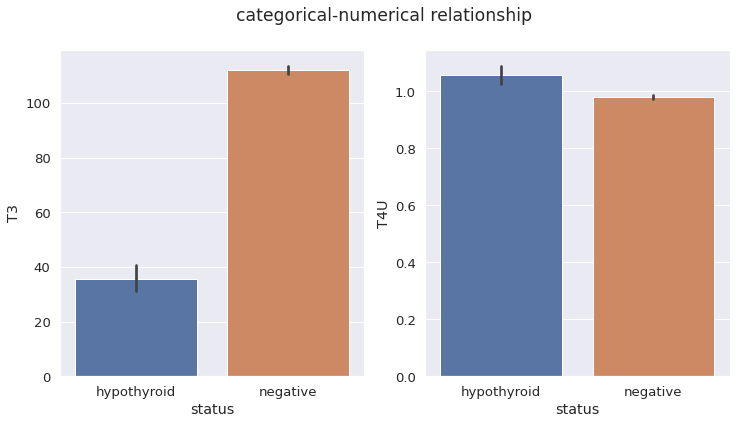

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(hypothyroid['status'], y= hypothyroid['T3'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['T4U'], ax=ax2)
plt.show()
#Those with high T3 have negative hypothyroid, whil the ones with low T3 have hypothyroid.
# T4U is almost the same on status of hypothyroid.

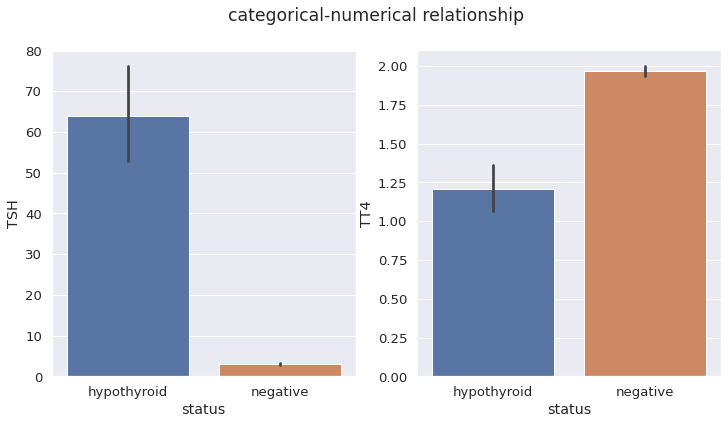

In [92]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(hypothyroid['status'], y= hypothyroid['TSH'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['TT4'], ax=ax2)
plt.show()
# those with hypothyroid have high TSH, while with low TT4

### 3. Multivariate Analysis

In [143]:
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n


In [144]:
hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
dtype: object

In [145]:
hypothyroid.shape

(3090, 25)

In [146]:

# separating labels and features
X = hypothyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = hypothyroid['status']

In [147]:
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
# scaling the data
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [150]:
#training and making prediction
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [151]:
#evaluating performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[ 17   9]
 [  2 590]]
Accuracy0.982200647249191


LABEL ENCODING

In [153]:
#data for label encoding

hypothyroid_encode =hypothyroid.copy(deep=True)

hypothyroid_encode['sex']=hypothyroid_encode['sex'].astype('category')
hypothyroid_encode['on_thyroxine']=hypothyroid_encode['on_thyroxine'].astype('category')
hypothyroid_encode['query_on_thyroxine']=hypothyroid_encode['query_on_thyroxine'].astype('category')
hypothyroid_encode['on_antithyroid_medication']=hypothyroid_encode['on_antithyroid_medication'].astype('category')
hypothyroid_encode['thyroid_surgery']=hypothyroid_encode['thyroid_surgery'].astype('category')
hypothyroid_encode['query_hypothyroid']=hypothyroid_encode['query_hypothyroid'].astype('category')
hypothyroid_encode['query_hyperthyroid']=hypothyroid_encode['query_hyperthyroid'].astype('category')
hypothyroid_encode['pregnant']=hypothyroid_encode['pregnant'].astype('category')
hypothyroid_encode['sick']=hypothyroid_encode['sick'].astype('category')
hypothyroid_encode['tumor']=hypothyroid_encode['tumor'].astype('category')
hypothyroid_encode['lithium']=hypothyroid_encode['lithium'].astype('category')
hypothyroid_encode['goitre']=hypothyroid_encode['goitre'].astype('category')
hypothyroid_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3090 non-null   object  
 1   age                        3090 non-null   int64   
 2   sex                        3090 non-null   category
 3   on_thyroxine               3090 non-null   category
 4   query_on_thyroxine         3090 non-null   category
 5   on_antithyroid_medication  3090 non-null   category
 6   thyroid_surgery            3090 non-null   category
 7   query_hypothyroid          3090 non-null   category
 8   query_hyperthyroid         3090 non-null   category
 9   pregnant                   3090 non-null   category
 10  sick                       3090 non-null   category
 11  tumor                      3090 non-null   category
 12  lithium                    3090 non-null   category
 13  goitre                     3090 n

In [ ]:
hypothyroid_encode.head(2)

In [154]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder

LabelEncoder =LabelEncoder()


hypothyroid_encode['sex']=LabelEncoder.fit_transform(hypothyroid_encode['sex'])
hypothyroid_encode['on_thyroxine']=LabelEncoder.fit_transform(hypothyroid_encode['on_thyroxine'])
hypothyroid_encode['query_on_thyroxine']=LabelEncoder.fit_transform(hypothyroid_encode['query_on_thyroxine'])
hypothyroid_encode['on_antithyroid_medication']=LabelEncoder.fit_transform(hypothyroid_encode['on_antithyroid_medication'])
hypothyroid_encode['thyroid_surgery']=LabelEncoder.fit_transform(hypothyroid_encode['thyroid_surgery'])
hypothyroid_encode['query_hypothyroid']=LabelEncoder.fit_transform(hypothyroid_encode['query_hypothyroid'])
hypothyroid_encode['query_hyperthyroid']=LabelEncoder.fit_transform(hypothyroid_encode['query_hyperthyroid'])
hypothyroid_encode['pregnant']=LabelEncoder.fit_transform(hypothyroid_encode['pregnant'])
hypothyroid_encode['sick']=LabelEncoder.fit_transform(hypothyroid_encode['sick'])
hypothyroid_encode['tumor']=LabelEncoder.fit_transform(hypothyroid_encode['tumor'])
hypothyroid_encode['lithium']=LabelEncoder.fit_transform(hypothyroid_encode['lithium'])
hypothyroid_encode['goitre']=LabelEncoder.fit_transform(hypothyroid_encode['goitre'])
hypothyroid_encode.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,4.0,y,0.2,y,1.00,y,0.0,n
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,6.0,y,0.4,y,1.04,y,6.0,n
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,57.0,y,1.2,y,1.28,y,44.0,n


In [155]:
hypothyroid_encode['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [157]:
hypothyroid_encode.loc[hypothyroid_encode['status']=='hypothyroid', 'status']='0'
hypothyroid_encode.loc[hypothyroid_encode['status']=='negative', 'status']='1'
hypothyroid_encode['status'].unique()

array(['0', '1'], dtype=object)

In [158]:
#separating target label; 'status' from other features
feature = hypothyroid_encode.drop(['status', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], 1)
label = hypothyroid_encode['status']

feature.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,15.0,0.6,1.48,10.0
1,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,19.0,1.7,1.13,17.0
2,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,4.0,0.2,1.00,0.0
3,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,6.0,0.4,1.04,6.0
4,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,57.0,1.2,1.28,44.0


In [159]:
hypothyroid_encode.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,4.0,y,0.2,y,1.00,y,0.0,n
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,6.0,y,0.4,y,1.04,y,6.0,n
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,57.0,y,1.2,y,1.28,y,44.0,n


## 7. Modelling

### Part 1: Decision trees:

**Random Forest**

In [117]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [201]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroid or not
y = hypothyroid_encode['status'].values

#X = hypothyroid_encode[['age',	'TSH', 'T3',	'TT4',	'T4U', 'FTI']].values

test_features = hypothyroid_encode[['age',	'TSH', 'T3',	'TT4',	'T4U', 'FTI']].columns.to_list()

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypothyroid_encode[test_features].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame

,Actual,Predicted
0,1,0.998313
1,1,0.997572
2,1,0.999980
3,1,0.999980
4,1,0.999980
...,...,...
922,1,0.999980
923,1,0.999980
924,1,0.999980
925,1,0.999980


In [202]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.013346033419016108
Mean Squared Error: 0.005679235795246301
Root Mean Squared Error: 0.07536070458300069


From RMSE we can see that we have 7.5% 

In [ ]:
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', r2_score(y, y_pred_tree))

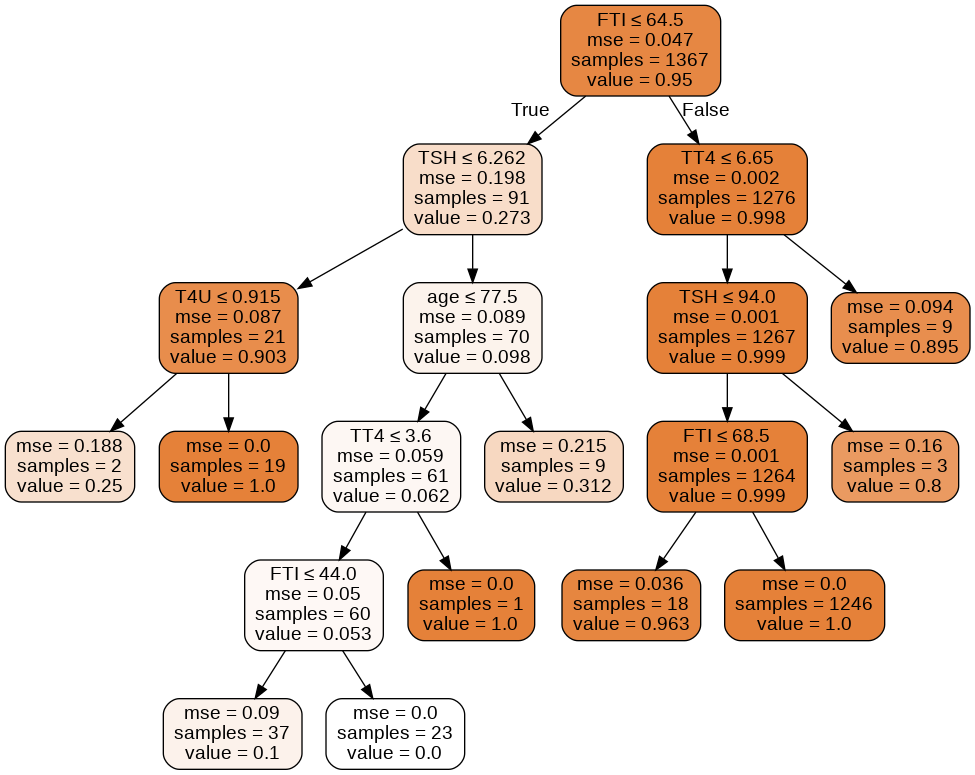

In [205]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

it shows that 1367 samples were tested

In [195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
tree = DecisionTreeRegressor(max_depth=5)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

In [196]:
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', r2_score(y, y_pred_tree))

Training score:  0.9011482666665944
Test score:  0.8856724616032727


when we increase the random state the training score increases and the test score reduces. so its best to have the lowest value for random sate.

**Gradient boost**

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)


In [192]:
print('Training score: ', gbr.score(X_train, y_train))
print('Test score: ', r2_score(y, y_pred_gbr))

Training score:  0.9543266967138324
Test score:  0.9218393312175646


when we reduce the learning rate the training score percantage reduce and vice versa. the same apliies to max_depth.

In [206]:
# Get numerical feature importances
importances = list(gbr.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('TSH', 0.27), ('T3', 0.03), ('TT4', 0.01), ('T4U', 0.0), ('FTI', 0.67)]

Variable: FTI                  Importance: 0.67
Variable: TSH                  Importance: 0.27
Variable: T3                   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.0


Gradient boost

Training score:  0.9543266967138324

Test score:  0.9218393312175646

Random forest
Training score:  0.9011482666665944

Test score:  0.8856724616032727

gradient boost produced the best model. The reason i used it to find important features.

### Part 2: SVM:

In [207]:
y =  hypothyroid_encode['status'].values

X= hypothyroid_encode[['FTI', 'TSH']]


#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

A. Polynomial

In [208]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [211]:
X.shape

(3090, 2)

ValueError: ignored

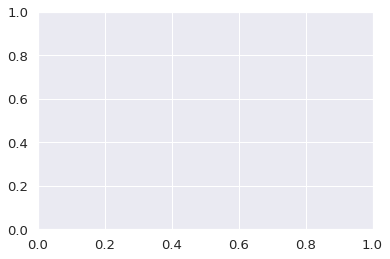

In [215]:
#Visualization
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:0], X[:1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()